<a href="https://colab.research.google.com/github/nadiatussilvi/test/blob/main/FINAL_PROJECT_SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FORECASTING SALES

###### 1. IMPORTING 

Pertama, akan dilakukan import software library yang diperlukan untuk sesi ini, antara lain: 
1. Data Manipulasi
pandas, dapat dialiaskan/disingkat sebagai pd
numpy, dapat dialiaskan/disingkat sebagai np
2. Data Visualisasi
matplotlib.pyplot, dapat dialiaskan/disingkat sebagai plt
seaborn, dapat dialiaskan/disingkat sebagai sns
3. Modeling
statsmodels
statsmodels.api, dapat dialiaskan/disingkat sebagai sm
statsmodels.tsa.api, dapat dialiaskan/disingkat sebagai smt
statsmodels.formula.api, dapat dialiaskan/disingkat sebagai smf
adfuller (Augmented Dickey Fuller test)
Model ARIMA
Model HoltWinters (Model Exponential Smoothing, Simple Exponential Smoothing, Holt)
Model SARIMAX
sklearn
sklearn.metrics (MAE, MAPE, MSE)
4. Set warning
5. %Magic command line
6. package, modul lainnya

In [ ]:
import pandas as pd                   # Alias digunakan untuk mempermudah kita memanggil software library dan methods didalamnya
import numpy as np                    # Numpy adalah paket dasar untuk komputasi ilmiah di python
from math import sqrt                 # memanggil function sqrt, operasi matematika akar
from pandas import Series             # function Series seperti aray 1 dimensi (dengan axis sebagai index) untuk menyimpan berbagai
                                      #tipe data, seperti integer, string, float, python objects, etc.

from matplotlib import pyplot         # pyplot adalah sekumpulan fungsi dari matplotlib yang membuatnya bekerja seperti halnya MATLAB.
from matplotlib.pyplot import figure  # figure memberikan identifier unik untuk sebuah gambar grafik dari pyplot
import matplotlib.pyplot as plt       # matplotlib adalah library komprehensif untuk membuat visualisasi statis, animasi, maupun interaktif di Python
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k') # menetapkan format gambar grafik dg ukuran (16,12), dpi=80, facecolor=white, edgecolor=black
from matplotlib.pylab import rcParams # rc (runtime configuration) parameters, untuk merubah tampilan visual output matplotlib secara interaktif, 
                                      # (misal ubah warna, jenis garis untuk grafik dll)

import statsmodels.api as sm          # modul berisikan classes dan functions digunakan untuk estimasi model-model statistik, uji tes statistik, dan eksplorasi data.
import statsmodels.tsa.api as smt     # digunakan untuk mengakses Time-series models dan methods pd librari statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt  # mengakses 3 modul holt-winters di modul time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose #mengakses modul seasonal decompose pada modul time series analysis
from statsmodels.tsa.stattools import adfuller # mengakses function Augmented Dickey-Fuller unit root test. 
from statsmodels.tsa.arima_model import ARIMA  # mengakses function ARIMA
import statsmodels.formula.api as smf # digunakan untuk menentukan model dengan formula strings dan DataFrames.
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 

from datetime import datetime         
import warnings                       # built-in modul untuk menghandle message dari issue warning, jika ada package yg obsolete
warnings.filterwarnings('ignore')     # filter untuk mengabaikan tipe warning
import sys                            # mengakses built-in function pada Python (args maupun keyword-args)
import itertools                      # digunakan iterasi pada struktur data yang dapat ditulis ulang menggunakan for-loop. 
                                      # Struktur data seperrti ini juga dikenal sebagai iterables
import seaborn as sns                 # Adalah library visualisasi data di Python yg berdasarkan matplotlib
%matplotlib inline   

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2. Uploading the data into Jupyter notebook
Akan mengupload file tabel_sales.csv dari cloud kedalam Jupyter notebook di google colabs ini

In [ ]:
# data tabel sales (hasil inner join dari beberapa data)
data_sales=pd.read_csv(r"/content/tabel_sales.csv")
# data order_items
data_order_item=pd.read_csv(r"/content/order_items.csv")
# data order
data_order=pd.read_csv(r"/content/orders.csv")
# data user
data_user=pd.read_csv(r"/content/users.csv")
# data inventory
data_inventory=pd.read_csv(r"/content/inventory_items.csv")


In [ ]:
# Memanggil data-sales
data_sales=pd.read_csv('/content/tabel_sales.csv')

# Melihat jumlah baris dan kolom
data_sales.shape

(180508, 17)

In [ ]:
data_sales

,first_name,last_name,country,user_id,num_of_item,product_id,product_brand,product_category,product_department,gender,created_at,shipped_at,delivered_at,returned_at,status,sale_price,sum
0,Aaron,Aguilar,United States,20889,1,17272,Metal Mulisha,Fashion Hoodies & Sweatshirts,Men,M,2021-05-07 07:36:46+07,2021-05-09 12:01:00+07,NaN,NaN,Shipped,62.000000,31.992000
1,Aaron,Alexander,China,70824,1,22136,Haggar,Pants,Men,M,2020-09-14 10:30:47+07,2020-09-16 18:59:00+07,NaN,NaN,Shipped,44.990002,20.605421
2,Aaron,Alexander,China,70824,1,26888,Botany 500,Sleep & Lounge,Men,M,2021-04-20 11:47:33+07,2021-04-22 01:30:00+07,NaN,NaN,Shipped,24.900000,9.711000
3,Aaron,Ali,United States,60968,1,16079,French Connection,Tops & Tees,Men,M,2022-01-21 21:58:24+07,2022-01-24 09:49:00+07,NaN,NaN,Shipped,98.000000,51.352000
4,Aaron,Alvarez,South Korea,15181,1,16643,IZOD,Tops & Tees,Men,M,2022-04-03 08:41:29+07,NaN,NaN,NaN,Processing,33.220001,17.141521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180503,Zoe,Taylor,Brasil,2100,1,4758,Calvin Klein Jeans,Jeans,Women,F,2022-04-21 08:20:25+07,2022-04-22 11:15:00+07,2022-04-23 15:10:00+07,2022-04-24 08:07:00+07,Returned,47.020000,24.450400
180504,Zoe,Taylor,Brasil,2100,1,6205,Jones New York,Leggings,Women,F,2022-03-27 07:54:35+07,NaN,NaN,NaN,Cancelled,119.000000,72.352000
180505,Zoe,Taylor,Brasil,2100,1,6365,Volcom,Shorts,Women,F,2022-04-05 07:28:03+07,NaN,NaN,NaN,Processing,49.500000,24.057000
180506,Zoe,Taylor,Brasil,2100,1,15810,Neon Buddha,Plus,Women,F,2022-03-27 09:04:28+07,2022-03-27 10:54:00+07,2022-03-29 10:32:00+07,NaN,Complete,50.000000,23.850000


In [ ]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180508 entries, 0 to 180507
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_name          180508 non-null  object 
 1   last_name           180508 non-null  object 
 2   country             180508 non-null  object 
 3   user_id             180508 non-null  int64  
 4   num_of_item         180508 non-null  int64  
 5   product_id          180508 non-null  int64  
 6   product_brand       180365 non-null  object 
 7   product_category    180508 non-null  object 
 8   product_department  180508 non-null  object 
 9   gender              180508 non-null  object 
 10  created_at          180508 non-null  object 
 11  shipped_at          117502 non-null  object 
 12  delivered_at        63035 non-null   object 
 13  returned_at         17752 non-null   object 
 14  status              180508 non-null  object 
 15  sale_price          180508 non-nul

In [ ]:
# Mengubah type data object menjadi datetime

data_sales['created_at']=pd.to_datetime(data_sales['created_at'])


data_sales['shipped_at']=pd.to_datetime(data_sales['shipped_at'])


data_sales['delivered_at']=pd.to_datetime(data_sales['delivered_at'])


data_sales['returned_at']=pd.to_datetime(data_sales['returned_at'])

data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180508 entries, 0 to 180507
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype                                
---  ------              --------------   -----                                
 0   first_name          180508 non-null  object                               
 1   last_name           180508 non-null  object                               
 2   country             180508 non-null  object                               
 3   user_id             180508 non-null  int64                                
 4   num_of_item         180508 non-null  int64                                
 5   product_id          180508 non-null  int64                                
 6   product_brand       180365 non-null  object                               
 7   product_category    180508 non-null  object                               
 8   product_department  180508 non-null  object                               
 9   gend

###### dapat dilihat pada data sum yaitu hasil dari perkalian anatara num_of_item dan sale price terdapat 1 yang bernilai null, sehingga data null tersebut akan diisi berdasarkan rata-rata dari seluruh nilai penjualan

In [ ]:
mean = data_sales["sum"].mean()
data_sales["sum"] = data_sales["sum"].replace(np.nan, mean)
data_sales

,first_name,last_name,country,user_id,num_of_item,product_id,product_brand,product_category,product_department,gender,created_at,shipped_at,delivered_at,returned_at,status,sale_price,sum
0,Aaron,Aguilar,United States,20889,1,17272,Metal Mulisha,Fashion Hoodies & Sweatshirts,Men,M,2021-05-07 07:36:46+07,2021-05-09 12:01:00+07,NaN,NaN,Shipped,62.000000,31.992000
1,Aaron,Alexander,China,70824,1,22136,Haggar,Pants,Men,M,2020-09-14 10:30:47+07,2020-09-16 18:59:00+07,NaN,NaN,Shipped,44.990002,20.605421
2,Aaron,Alexander,China,70824,1,26888,Botany 500,Sleep & Lounge,Men,M,2021-04-20 11:47:33+07,2021-04-22 01:30:00+07,NaN,NaN,Shipped,24.900000,9.711000
3,Aaron,Ali,United States,60968,1,16079,French Connection,Tops & Tees,Men,M,2022-01-21 21:58:24+07,2022-01-24 09:49:00+07,NaN,NaN,Shipped,98.000000,51.352000
4,Aaron,Alvarez,South Korea,15181,1,16643,IZOD,Tops & Tees,Men,M,2022-04-03 08:41:29+07,NaN,NaN,NaN,Processing,33.220001,17.141521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60660,Glen,Williams,United States,24990,2,18847,Carhartt,Sweaters,Men,M,2022-05-30 18:43:10+07,2022-06-02 11:30:00+07,NaN,NaN,Shipped,43.950001,23.689050
60661,Glen,Williams,United States,24990,2,26451,Gregg Homme,Underwear,Men,M,2022-06-01 21:42:18+07,2022-06-02 11:30:00+07,NaN,NaN,Shipped,23.900000,10.492100
60662,Glenda,Anderson,France,51230,1,10968,Hanes,Intimates,Women,F,2022-04-18 04:16:32+07,2022-04-20 06:07:00+07,2022-04-21 15:02:00+07,NaN,Complete,12.140000,6.458480
60663,Glenda,Anderson,France,51230,1,11405,Vanity Fair,Intimates,Women,F,2022-05-21 04:22:10+07,NaN,NaN,NaN,Processing,15.000000,7.260000


In [ ]:
data_sales.dropna(subset=["product_brand"], axis=0)

,first_name,last_name,country,user_id,num_of_item,product_id,product_brand,product_category,product_department,gender,created_at,shipped_at,delivered_at,returned_at,status,sale_price,sum
0,Aaron,Aguilar,United States,20889,1,17272,Metal Mulisha,Fashion Hoodies & Sweatshirts,Men,M,2021-05-07 07:36:46+07,2021-05-09 12:01:00+07,NaN,NaN,Shipped,62.000000,31.992000
1,Aaron,Alexander,China,70824,1,22136,Haggar,Pants,Men,M,2020-09-14 10:30:47+07,2020-09-16 18:59:00+07,NaN,NaN,Shipped,44.990002,20.605421
2,Aaron,Alexander,China,70824,1,26888,Botany 500,Sleep & Lounge,Men,M,2021-04-20 11:47:33+07,2021-04-22 01:30:00+07,NaN,NaN,Shipped,24.900000,9.711000
3,Aaron,Ali,United States,60968,1,16079,French Connection,Tops & Tees,Men,M,2022-01-21 21:58:24+07,2022-01-24 09:49:00+07,NaN,NaN,Shipped,98.000000,51.352000
4,Aaron,Alvarez,South Korea,15181,1,16643,IZOD,Tops & Tees,Men,M,2022-04-03 08:41:29+07,NaN,NaN,NaN,Processing,33.220001,17.141521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60660,Glen,Williams,United States,24990,2,18847,Carhartt,Sweaters,Men,M,2022-05-30 18:43:10+07,2022-06-02 11:30:00+07,NaN,NaN,Shipped,43.950001,23.689050
60661,Glen,Williams,United States,24990,2,26451,Gregg Homme,Underwear,Men,M,2022-06-01 21:42:18+07,2022-06-02 11:30:00+07,NaN,NaN,Shipped,23.900000,10.492100
60662,Glenda,Anderson,France,51230,1,10968,Hanes,Intimates,Women,F,2022-04-18 04:16:32+07,2022-04-20 06:07:00+07,2022-04-21 15:02:00+07,NaN,Complete,12.140000,6.458480
60663,Glenda,Anderson,France,51230,1,11405,Vanity Fair,Intimates,Women,F,2022-05-21 04:22:10+07,NaN,NaN,NaN,Processing,15.000000,7.260000


In [ ]:
# Memanggil data order_item
data_order_item=pd.read_csv('/content/order_items.csv')


# Melihat jumlah baris dan kolom
data_order_item.shape

(99695, 11)

In [ ]:
data_order_item

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,59347,41038,33153,13606,160256,Shipped,2020-01-05 08:14:27+00:00,2020-01-06 20:56:00+00:00,NaT,NaT,2.50
1,101072,69979,56200,13606,272958,Shipped,2022-05-17 07:06:19+00:00,2022-05-19 10:42:00+00:00,NaT,NaT,2.50
2,63687,44006,35515,13606,171991,Complete,2021-01-21 04:56:58+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaT,2.50
3,16338,11275,9230,13606,44149,Cancelled,2022-05-31 08:55:48.353609+00:00,NaT,NaT,NaT,2.50
4,85756,59418,47846,13606,231665,Cancelled,2022-05-22 11:36:45+00:00,NaT,NaT,NaT,2.50
...,...,...,...,...,...,...,...,...,...,...,...
180503,102243,70792,56851,3633,276090,Processing,2022-01-14 04:07:53+00:00,NaT,NaT,NaT,9.32
180504,134300,92879,74538,3633,362611,Processing,2021-12-13 05:53:52+00:00,NaT,NaT,NaT,9.32
180505,169592,117130,94127,3449,457985,Shipped,2020-12-08 04:56:12+00:00,2020-12-04 17:42:00+00:00,NaT,NaT,9.82
180506,84906,58830,47366,3449,229398,Complete,2019-03-04 12:43:19+00:00,2019-03-01 15:24:00+00:00,2019-03-03 05:05:00+00:00,NaT,9.82


In [ ]:
mean = data_order_item["sale_price"].mean()
data_order_item["sale_price"] = data_order_item["sale_price"].replace(np.nan, mean)
data_order_item

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,59347,41038,33153,13606,160256,Shipped,2020-01-05 08:14:27+00:00,2020-01-06 20:56:00+00:00,NaT,NaT,2.50
1,101072,69979,56200,13606,272958,Shipped,2022-05-17 07:06:19+00:00,2022-05-19 10:42:00+00:00,NaT,NaT,2.50
2,63687,44006,35515,13606,171991,Complete,2021-01-21 04:56:58+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaT,2.50
3,16338,11275,9230,13606,44149,Cancelled,2022-05-31 08:55:48.353609+00:00,NaT,NaT,NaT,2.50
4,85756,59418,47846,13606,231665,Cancelled,2022-05-22 11:36:45+00:00,NaT,NaT,NaT,2.50
...,...,...,...,...,...,...,...,...,...,...,...
180503,102243,70792,56851,3633,276090,Processing,2022-01-14 04:07:53+00:00,NaT,NaT,NaT,9.32
180504,134300,92879,74538,3633,362611,Processing,2021-12-13 05:53:52+00:00,NaT,NaT,NaT,9.32
180505,169592,117130,94127,3449,457985,Shipped,2020-12-08 04:56:12+00:00,2020-12-04 17:42:00+00:00,NaT,NaT,9.82
180506,84906,58830,47366,3449,229398,Complete,2019-03-04 12:43:19+00:00,2019-03-01 15:24:00+00:00,2019-03-03 05:05:00+00:00,NaT,9.82


In [ ]:
data_order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180508 entries, 0 to 180507
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   id                 180508 non-null  int64              
 1   order_id           180508 non-null  int64              
 2   user_id            180508 non-null  int64              
 3   product_id         180508 non-null  int64              
 4   inventory_item_id  180508 non-null  int64              
 5   status             180508 non-null  object             
 6   created_at         180508 non-null  datetime64[ns, UTC]
 7   shipped_at         117502 non-null  datetime64[ns, UTC]
 8   delivered_at       63035 non-null   datetime64[ns, UTC]
 9   returned_at        17752 non-null   datetime64[ns, UTC]
 10  sale_price         180508 non-null  float64            
dtypes: datetime64[ns, UTC](4), float64(1), int64(5), object(1)
memory usage: 15.1+ MB


In [ ]:
# Mengubah type data object menjadi datetime

data_order_item['created_at']=pd.to_datetime(data_order_item['created_at'])


data_order_item['shipped_at']=pd.to_datetime(data_order_item['shipped_at'])


data_order_item['delivered_at']=pd.to_datetime(data_order_item['delivered_at'])


data_order_item['returned_at']=pd.to_datetime(data_order_item['returned_at'])

data_order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180508 entries, 0 to 180507
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   id                 180508 non-null  int64              
 1   order_id           180508 non-null  int64              
 2   user_id            180508 non-null  int64              
 3   product_id         180508 non-null  int64              
 4   inventory_item_id  180508 non-null  int64              
 5   status             180508 non-null  object             
 6   created_at         180508 non-null  datetime64[ns, UTC]
 7   shipped_at         117502 non-null  datetime64[ns, UTC]
 8   delivered_at       63035 non-null   datetime64[ns, UTC]
 9   returned_at        17752 non-null   datetime64[ns, UTC]
 10  sale_price         180508 non-null  float64            
dtypes: datetime64[ns, UTC](4), float64(1), int64(5), object(1)
memory usage: 15.1+ MB


In [ ]:
# Memanggil data order
data_order=pd.read_csv('/content/orders.csv')


# Melihat jumlah baris dan kolom
data_order.shape

(124512, 9)

In [ ]:
data_order

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,11,9,Shipped,F,2021-12-11 05:34:00+00:00,NaN,2021-12-12 10:01:00+00:00,NaN,3
1,12,9,Shipped,F,2022-01-18 05:34:00+00:00,NaN,2022-01-19 20:20:00+00:00,NaN,1
2,22,14,Shipped,F,2020-08-18 11:51:00+00:00,NaN,2020-08-20 16:45:00+00:00,NaN,1
3,25,16,Shipped,F,2020-12-16 08:35:00+00:00,NaN,2020-12-17 21:43:00+00:00,NaN,2
4,26,16,Shipped,F,2020-09-07 08:35:00+00:00,NaN,2020-09-10 00:15:00+00:00,NaN,1
...,...,...,...,...,...,...,...,...,...
124507,124467,99958,Processing,M,2022-05-14 09:32:00+00:00,NaN,NaN,NaN,1
124508,124468,99958,Processing,M,2022-05-25 09:32:00+00:00,NaN,NaN,NaN,1
124509,124491,99980,Processing,M,2021-10-07 00:32:00+00:00,NaN,NaN,NaN,2
124510,124502,99991,Processing,M,2021-05-31 14:50:00+00:00,NaN,NaN,NaN,1


In [ ]:
data_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124512 entries, 0 to 124511
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   order_id      124512 non-null  int64 
 1   user_id       124512 non-null  int64 
 2   status        124512 non-null  object
 3   gender        124512 non-null  object
 4   created_at    124512 non-null  object
 5   returned_at   12149 non-null   object
 6   shipped_at    80884 non-null   object
 7   delivered_at  43418 non-null   object
 8   num_of_item   124512 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 8.5+ MB


In [ ]:
# Mengubah type data object menjadi datetime

data_order['created_at']=pd.to_datetime(data_order['created_at'])


data_order['shipped_at']=pd.to_datetime(data_order['shipped_at'])


data_order['delivered_at']=pd.to_datetime(data_order['delivered_at'])


data_order['returned_at']=pd.to_datetime(data_order['returned_at'])

data_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124512 entries, 0 to 124511
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   order_id      124512 non-null  int64              
 1   user_id       124512 non-null  int64              
 2   status        124512 non-null  object             
 3   gender        124512 non-null  object             
 4   created_at    124512 non-null  datetime64[ns, UTC]
 5   returned_at   12149 non-null   datetime64[ns, UTC]
 6   shipped_at    80884 non-null   datetime64[ns, UTC]
 7   delivered_at  43418 non-null   datetime64[ns, UTC]
 8   num_of_item   124512 non-null  int64              
dtypes: datetime64[ns, UTC](4), int64(3), object(2)
memory usage: 8.5+ MB


In [ ]:
# Memanggil data user
data_user=pd.read_csv('/content/users.csv')


# Melihat jumlah baris dan kolom
data_user.shape

(57189, 15)

In [ ]:
data_user

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,19279,Heidi,Jackson,heidijackson@example.org,50,F,Mie,894 Nicholas Curve Suite 865,513-0836,Suzuka City,Japan,34.851814,136.508713,Search,2020-11-07 12:40:00+00:00
1,5678,Michael,Brooks,michaelbrooks@example.org,58,M,Acre,0549 Deanna Land,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Email,2019-07-28 04:20:00+00:00
2,29694,Scott,Anderson,scottanderson@example.org,60,M,Acre,8979 Stephens Oval Apt. 816,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Facebook,2019-08-16 17:06:00+00:00
3,29967,Mike,Beck,mikebeck@example.org,12,M,Acre,76404 Michael Way Apt. 377,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2019-05-09 12:08:00+00:00
4,47096,Holly,Kennedy,hollykennedy@example.org,68,F,Acre,23658 Santana Mission,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2019-05-24 15:53:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57184,39936,Russell,Garner,russellgarner@example.org,22,M,Zhejiang,99452 Pamela Hill,325401,Tianjin,China,27.597933,120.601684,Organic,2020-08-11 11:58:00+00:00
57185,41478,Christopher,Martinez,christophermartinez@example.com,56,M,Zhejiang,404 Tucker Loop,325401,Tianjin,China,27.597933,120.601684,Display,2021-05-22 15:35:00+00:00
57186,43532,Peter,Smith,petersmith@example.org,64,M,Zhejiang,6678 Mckenzie Landing,325401,Tianjin,China,27.597933,120.601684,Search,2021-06-02 14:56:00+00:00
57187,44105,Kyle,Williams,kylewilliams@example.com,28,M,Zhejiang,97503 Robert Oval Apt. 280,325401,Tianjin,China,27.597933,120.601684,Search,2020-07-22 11:34:00+00:00


In [ ]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57189 entries, 0 to 57188
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              57189 non-null  int64  
 1   first_name      57189 non-null  object 
 2   last_name       57189 non-null  object 
 3   email           57189 non-null  object 
 4   age             57189 non-null  int64  
 5   gender          57189 non-null  object 
 6   state           57189 non-null  object 
 7   street_address  57189 non-null  object 
 8   postal_code     57189 non-null  object 
 9   city            56556 non-null  object 
 10  country         57189 non-null  object 
 11  latitude        57189 non-null  float64
 12  longitude       57189 non-null  float64
 13  traffic_source  57189 non-null  object 
 14  created_at      57189 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 6.5+ MB


In [ ]:
# Memanggil data inventory
data_inventory=pd.read_csv('/content/inventory_items.csv')


# Melihat jumlah baris dan kolom
data_inventory.shape

(58164, 12)

In [ ]:
data_inventory

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,90967,16898,2021-07-19 02:20:10+00:00,2021-07-20 14:34:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3.0
1,90968,16898,2020-04-13 07:46:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3.0
2,90969,16898,2020-09-02 17:43:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3.0
3,90970,16898,2021-08-19 15:17:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3.0
4,96715,16898,2020-05-09 11:16:10+00:00,2020-06-23 23:59:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
58159,320138,1313,2020-03-23 00:22:00+00:00,NaN,31.995,Sweaters,Cotton/Cashmere Crew-neck Sweater / Petite,Orvis,79.0,Women,F09696910BDD874A99CD74C8F05B5C44,8.0
58160,420138,1313,2020-07-11 05:06:57+00:00,2020-08-30 04:20:57+00:00,31.995,Sweaters,Cotton/Cashmere Crew-neck Sweater / Petite,Orvis,79.0,Women,F09696910BDD874A99CD74C8F05B5C44,8.0
58161,420139,1313,2022-05-02 16:56:00+00:00,NaN,31.995,Sweaters,Cotton/Cashmere Crew-neck Sweater / Petite,Orvis,79.0,Women,F09696910BDD874A99CD74C8F05B5C44,8.0
58162,420140,1313,2020-01-30 18:25:00+00:00,NaN,31.995,Sweaters,Cotton/Cashmere Crew-neck Sweater / Petite,Orvis,79.0,Women,F09696910BDD874A99CD74C8F05B5C44,8.0


In [ ]:
data_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58164 entries, 0 to 58163
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              58164 non-null  int64  
 1   product_id                      58164 non-null  int64  
 2   created_at                      58164 non-null  object 
 3   sold_at                         21560 non-null  object 
 4   cost                            58164 non-null  float64
 5   product_category                58164 non-null  object 
 6   product_name                    58164 non-null  object 
 7   product_brand                   57789 non-null  object 
 8   product_retail_price            58163 non-null  float64
 9   product_department              58163 non-null  object 
 10  product_sku                     58163 non-null  object 
 11  product_distribution_center_id  58163 non-null  float64
dtypes: float64(3), int64(2), object(

### 3. Data Exploration
Akan berusaha memahami dan memeroleh pengetahuan lebih banyak tentang data yang diupload, dimana data diperoleh dari tabel_sales yang berasal dari sql dengan melibatkan beberapa Tabel yaitu sebgai primary data adalah order_items dan secondary data adalah orders, users, inventory_items

Sebelum masuk ke tahap analisis, kita perlu lakukan pre-processing, yaitu mengubah bentuk tipe data pemesanan dari 'object' ke 'datetime'.

In [ ]:
# Menampilkan nama kolom gabungan
data_sales.columns

Index(['first_name', 'last_name', 'country', 'user_id', 'num_of_item',
       'product_id', 'product_brand', 'product_category', 'product_department',
       'gender', 'created_at', 'shipped_at', 'delivered_at', 'returned_at',
       'status', 'sale_price', 'sum'],
      dtype='object')

In [ ]:
# Menampilkan info dari tiap variable
data_sales.info() # datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180508 entries, 0 to 180507
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_name          180508 non-null  object 
 1   last_name           180508 non-null  object 
 2   country             180508 non-null  object 
 3   user_id             180508 non-null  int64  
 4   num_of_item         180508 non-null  int64  
 5   product_id          180508 non-null  int64  
 6   product_brand       180365 non-null  object 
 7   product_category    180508 non-null  object 
 8   product_department  180508 non-null  object 
 9   gender              180508 non-null  object 
 10  created_at          180508 non-null  object 
 11  shipped_at          117502 non-null  object 
 12  delivered_at        63035 non-null   object 
 13  returned_at         17752 non-null   object 
 14  status              180508 non-null  object 
 15  sale_price          180508 non-nul

###### Dapat dilihat tipe data pada 'created_at','shipped_at','delivered_at','returned_at' masih berupa object, sehingga perlu diubah menjadi tipe data datetime menggunakan function pandas yaitu to_datetime()

In [ ]:
# Pada kolom created_at, ubah tipe data menjadi datetime
data_sales['created_at']=pd.to_datetime(data_sales['created_at'], infer_datetime_format=True)
# Pada kolom shipped_at, ubah tipe data menjadi datetime
data_sales['shipped_at']=pd.to_datetime(data_sales['shipped_at'], infer_datetime_format=True)
# Pada kolom delivered_at, ubah tipe data menjadi datetime
data_sales['delivered_at']=pd.to_datetime(data_sales['delivered_at'], infer_datetime_format=True)
# Pada kolom returned_at, ubah tipe data menjadi datetime
data_sales['returned_at']=pd.to_datetime(data_sales['returned_at'], infer_datetime_format=True)
# Cek tipe data 
print (data_sales.dtypes)

first_name                                           object
last_name                                            object
country                                              object
user_id                                               int64
num_of_item                                           int64
product_id                                            int64
product_brand                                        object
product_category                                     object
product_department                                   object
gender                                               object
created_at            datetime64[ns, pytz.FixedOffset(420)]
shipped_at            datetime64[ns, pytz.FixedOffset(420)]
delivered_at          datetime64[ns, pytz.FixedOffset(420)]
returned_at           datetime64[ns, pytz.FixedOffset(420)]
status                                               object
sale_price                                          float64
sum                                     

In [ ]:
data_sales.created_at.dt.month

0          5
1          9
2          4
3          1
4          4
          ..
180503     4
180504     3
180505     4
180506     3
180507    10
Name: created_at, Length: 180508, dtype: int64

In [ ]:
data_sales.head()

,first_name,last_name,country,user_id,num_of_item,product_id,product_brand,product_category,product_department,gender,created_at,shipped_at,delivered_at,returned_at,status,sale_price,sum
0,Aaron,Aguilar,United States,20889,1,17272,Metal Mulisha,Fashion Hoodies & Sweatshirts,Men,M,2021-05-07 07:36:46+07:00,2021-05-09 12:01:00+07:00,NaT,NaT,Shipped,62.000000,31.992000
1,Aaron,Alexander,China,70824,1,22136,Haggar,Pants,Men,M,2020-09-14 10:30:47+07:00,2020-09-16 18:59:00+07:00,NaT,NaT,Shipped,44.990002,20.605421
2,Aaron,Alexander,China,70824,1,26888,Botany 500,Sleep & Lounge,Men,M,2021-04-20 11:47:33+07:00,2021-04-22 01:30:00+07:00,NaT,NaT,Shipped,24.900000,9.711000
3,Aaron,Ali,United States,60968,1,16079,French Connection,Tops & Tees,Men,M,2022-01-21 21:58:24+07:00,2022-01-24 09:49:00+07:00,NaT,NaT,Shipped,98.000000,51.352000
4,Aaron,Alvarez,South Korea,15181,1,16643,IZOD,Tops & Tees,Men,M,2022-04-03 08:41:29+07:00,NaT,NaT,NaT,Processing,33.220001,17.141521


##### Ketika dealing dengan data time series, maka untuk menggunakan kolom yang mengandung 'date' sebagai index dari dataframe.

In [ ]:
# Set kolom 'created_at' sebagai index
data_sales=data_sales.set_index(['created_at'])
data_sales.head()

,first_name,last_name,country,user_id,num_of_item,product_id,product_brand,product_category,product_department,gender,shipped_at,delivered_at,returned_at,status,sale_price,sum
created_at,,,,,,,,,,,,,,,,
2021-05-07 07:36:46+07:00,Aaron,Aguilar,United States,20889,1,17272,Metal Mulisha,Fashion Hoodies & Sweatshirts,Men,M,2021-05-09 12:01:00+07:00,NaT,NaT,Shipped,62.000000,31.992000
2020-09-14 10:30:47+07:00,Aaron,Alexander,China,70824,1,22136,Haggar,Pants,Men,M,2020-09-16 18:59:00+07:00,NaT,NaT,Shipped,44.990002,20.605421
2021-04-20 11:47:33+07:00,Aaron,Alexander,China,70824,1,26888,Botany 500,Sleep & Lounge,Men,M,2021-04-22 01:30:00+07:00,NaT,NaT,Shipped,24.900000,9.711000
2022-01-21 21:58:24+07:00,Aaron,Ali,United States,60968,1,16079,French Connection,Tops & Tees,Men,M,2022-01-24 09:49:00+07:00,NaT,NaT,Shipped,98.000000,51.352000
2022-04-03 08:41:29+07:00,Aaron,Alvarez,South Korea,15181,1,16643,IZOD,Tops & Tees,Men,M,NaT,NaT,NaT,Processing,33.220001,17.141521


In [ ]:
# Summary statistics pada variabel '#num_of_item'
print (data_sales.describe().T)
print ('---------')

# Pembulatan decimal 2 angka di belakang koma
print(data_sales.describe().T.round(2))

# cost x num_of_item=sum

                count          mean           std     min       25%  \
user_id      180508.0  50171.351602  28839.688216  1.0000  25249.75   
num_of_item  180508.0      1.894021      1.058109  1.0000      1.00   
product_id   180508.0  15290.370105   8405.434843  1.0000   8050.00   
sale_price   180508.0     59.799867     65.844662  0.0200     24.90   
sum          180508.0     28.754903     30.628474  0.0083     11.40   

                      50%           75%            max  
user_id      50273.000000  75175.000000  100000.000000  
num_of_item      2.000000      2.000000       4.000000  
product_id   16029.000000  22547.000000   29120.000000  
sale_price      39.990002     69.949997     999.000000  
sum             19.955011     34.715039     557.151002  
---------
                count      mean       std   min       25%       50%       75%  \
user_id      180508.0  50171.35  28839.69  1.00  25249.75  50273.00  75175.00   
num_of_item  180508.0      1.89      1.06  1.00      1.00  

In [ ]:
# mengecek missing value
data_sales.isnull().sum() # menghitung data yg missing
# data.notnull().sum() # menghitung data yang tidak missing

first_name                 0
last_name                  0
country                    0
user_id                    0
num_of_item                0
product_id                 0
product_brand            143
product_category           0
product_department         0
gender                     0
shipped_at             63006
delivered_at          117473
returned_at           162756
status                     0
sale_price                 0
sum                        0
dtype: int64

In [ ]:
# data tabel_1a (hasil perhitungan 1a)
data_banyak_penjualan=pd.read_csv(r"/content/tabel_1a.csv")

In [ ]:
data_banyak_penjualan

,tahun,sales,number_of_order
0,2019,1.261704e+05,2149
1,2020,4.482826e+05,7524
2,2021,1.055349e+06,17767
3,2022,1.070767e+06,17843


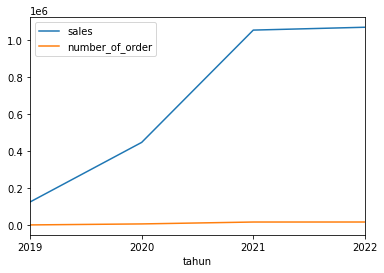

In [ ]:
# Line plot
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('/content/tabel_1a.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

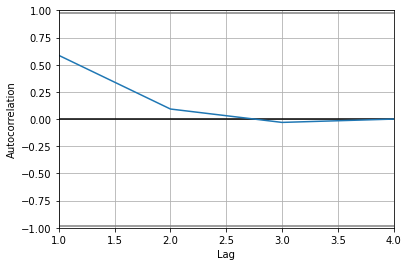

In [ ]:
# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('/content/tabel_1a.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

In [ ]:
import matplotlib.pyplot as plt
data_maxnegara = pd.read_csv ('/content/maxnegara.csv')

In [ ]:
print (data_maxnegara)

           country       product_brand  sales
0        Australia           Allegra K    231
1          Austria  KUT from the Kloth      2
2          Austria     eVogues Apparel      2
3          Belgium           Allegra K    139
4           Brasil           Allegra K   1684
5            China           Allegra K   3951
6         Colombia        Ralph Lauren      5
7           España           HUGO BOSS      8
8           France           Allegra K    569
9          Germany           Allegra K    535
10           Japan           Allegra K    253
11          Poland           Allegra K     31
12     South Korea           Allegra K    582
13           Spain           Allegra K    473
14  United Kingdom           Allegra K    576
15   United States           Allegra K   2502


In [ ]:
print ('product_brand')
print ('sales')

product_brand
sales


In [ ]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

data_gender_sales = pd.read_csv ('/content/tabel_gender_sales.csv')

sums = data_gender_sales.groupby(data_gender_sales["Female,Male;"])["sales"].sum()
axis('equal');
pie(sums, labels=sums.index);
show()

KeyError: ignored

In [ ]:
plt.figure(figsize=(10,8))
data_banyak_penjualan['number_of_order'].append(np.log(data_banyak_penjualan_result)).plot(label='Prediksi (log)')
data_banyak_penjualan['sales'].append(data_result).plot(label='Prediksi')
data_sales['sale_price'].plot(label='Data Actual')
plt.title('Plot penjualan dari Tahun 2019-2022')
plt.ylabel('sales ($)')
plt.grid()
plt.legend()
plt.savefig('../Output/Plot Penjualan dari Tahun 2019-2022')
plt.show()

NameError: ignored

<Figure size 720x576 with 0 Axes>

#### 4. Data Analysis
Untuk memulai data analysis, kita perlu mengeksplor data terlebih dahulu melalui visualisasi ke dalam bentuk grafik (Time series plot).

Tujuan dari time Series plot untuk memudahkan kita menemukan pattern atau pola dan temuan yang tidak biasa (unusual observations) dari dataset tabel_sales

4.1 Time Series Plot

TypeError: ignored

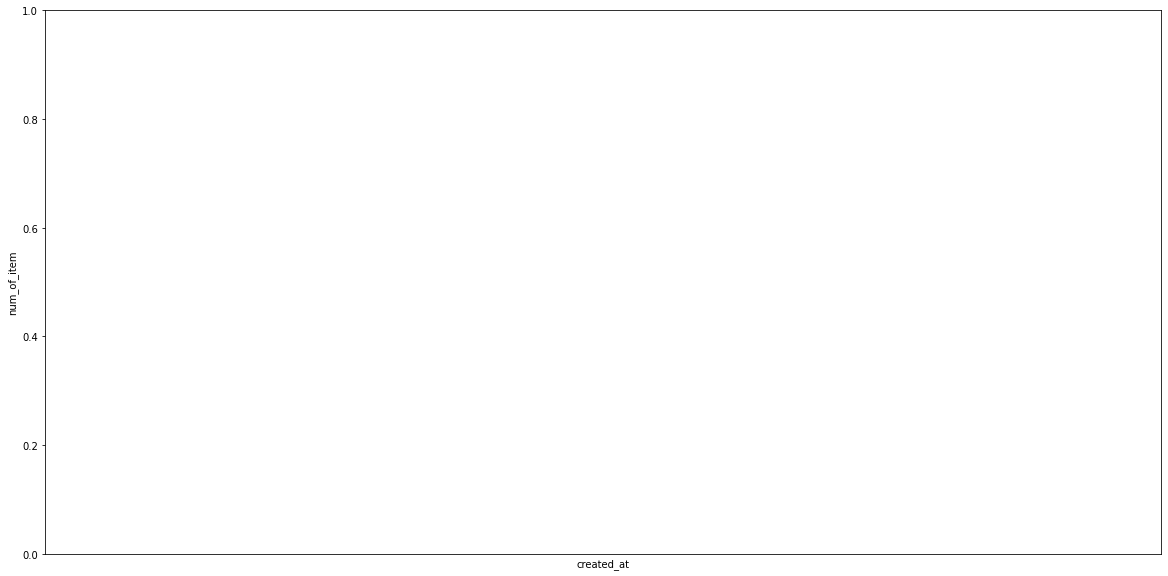

In [ ]:
# Time Series plot

import matplotlib.dates as mdates
import matplotlib.pyplot as plty

fig, ax = plty.subplots(figsize=(20,10))
plty.xlabel("created_at")
plty.ylabel("num_of_item")

half_year_locator = mdates.MonthLocator(interval = 6)
year_month_formatter = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(data)
fig.autofmt_xdate()
plty.grid()
plty.show()

#### Insights:

Dari grafik di atas, kita dapat melihat bahwa dari data jumlah penumpang 



In [ ]:
sales = store_sales.groupby('date').sum().squeeze().loc['2019']
Total_sales

In [ ]:
# Seasonal plot 

data2 = data_sales.reset_index()
data2['year'] = pd.DatetimeIndex(data2['created_at']).year
data2['created_at'] = pd.DatetimeIndex(data2['created_at']).month

# parameter hue digunakan untuk menampilkan multiple line chart berdasarkan tahun ('year')
sns.relplot (kind = 'line', data_sales = data2, x = 'month', y = '#num_of_item', hue = 'year', aspect = 2, marker='o' )

ValueError: ignored